<a href="https://colab.research.google.com/github/dl640/HMLynch/blob/main/tree_alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


#import csv file and read into pandas frame as stats_df

stats_df=pd.read_csv('/content/drive/MyDrive/Python Project/Montserrat/PersonT.csv',sep=',')
display(stats_df.head(25))

stats_df.info()

,PersonID,First Name,Last Name,Nee,Gender,MotherID,FatherID,Mother,Country of Birth,Year of Birth,Year of Death,Age,"Last Known Place of Residence(Country,City)",Notes,Grandmother,List30,Grandfather,List301,Grandmother1,List302,Grandfather1
0,1,Verron,Lynch,NaN,True,13.0,12.0,NaN,Antigua,1948.0,NaN,NaN,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Esther,Lynch,Desilva,False,91.0,92.0,NaN,Sri Lanka,NaN,NaN,NaN,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Dale,Lynch,NaN,True,2.0,1.0,NaN,Canada,1979.0,NaN,41.0,Montreal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lisa,Lynch,NaN,False,2.0,1.0,NaN,Canada,1984.0,NaN,NaN,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Gail,Lynch-Joseph,Lynch,False,0.0,1.0,NaN,Antigua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Reese,Lynch-Joseph,NaN,True,5.0,0.0,NaN,Antigua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Joshua,Lynch,NaN,True,10.0,3.0,NaN,Canada,NaN,NaN,NaN,Montreal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Josiah,Lynch,NaN,True,10.0,3.0,NaN,Canada,NaN,NaN,NaN,Montreal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Lyndon-Jude,Lynch,NaN,True,10.0,3.0,NaN,Canada,2009.0,NaN,NaN,Montreal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Michelle,NaN,Ryan,False,29.0,30.0,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PersonID                                     97 non-null     int64  
 1   First Name                                   97 non-null     object 
 2   Last Name                                    96 non-null     object 
 3   Nee                                          40 non-null     object 
 4   Gender                                       95 non-null     object 
 5   MotherID                                     92 non-null     float64
 6   FatherID                                     96 non-null     float64
 7   Mother                                       0 non-null      float64
 8   Country of Birth                             49 non-null     object 
 9   Year of Birth                                81 non-null     float64
 10  Year

In [ ]:
#drop columns 7-20

stats_df = stats_df[['PersonID','First Name','Last Name','MotherID','FatherID']]

stats_df

,PersonID,First Name,Last Name,MotherID,FatherID
0,1,Verron,Lynch,13.0,12.0
1,2,Esther,Lynch,91.0,92.0
2,3,Dale,Lynch,2.0,1.0
3,4,Lisa,Lynch,2.0,1.0
4,5,Gail,Lynch-Joseph,0.0,1.0
...,...,...,...,...,...
92,93,Brian,Lynch,94.0,18.0
93,94,Jacquline,Lynch,0.0,0.0
94,95,Joshua,Lynch,NaN,20.0
95,96,Marisa,Lynch,NaN,20.0


In [ ]:
Gen0=stats_df.loc[(stats_df['PersonID']==14) | (stats_df['PersonID']==15)]

Gen0.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 13 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PersonID    2 non-null      int64  
 1   First Name  2 non-null      object 
 2   Last Name   2 non-null      object 
 3   MotherID    2 non-null      float64
 4   FatherID    2 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 96.0+ bytes


In [ ]:
#create offeset positions for each name
Gen0.insert(5,'x2',[-.1,0.3])
Gen0.insert(6,'y2',[.3,0.3])
display(Gen0)

,PersonID,First Name,Last Name,MotherID,FatherID,x2,y2
13,14,John Henry,Lynch,38.0,37.0,-0.1,0.3
14,15,Mary Octavia,Lynch,0.0,0.0,0.3,0.3


In [ ]:
#import matplotlib.pyplot as plt



#plt.figure(figsize=(40,20))



# Loop thorugh each flight entry
#for x,y,First,Last in zip(Gen0['x2'],Gen0['y2'],Gen0['First Name'],Gen0['Last Name']):
 #   plt.plot([x],[y], color="grey", alpha=0.5)
  #  plt.scatter(x,y,color="orangered", alpha=0.8,)
   # plt.text(x2,y2,First,verticalalignment='top')                    
    #plt.text(x2,y2,Last,verticalalignment='bottom') 

Coding For Generation 1

In [ ]:
#get a list of all the kids of henry and mary

Gen1= stats_df.loc[(stats_df['FatherID']==14) | (stats_df['MotherID']==15)]
Gen1=Gen1.set_index('PersonID')

Gen1=Gen1.reset_index()
display(Gen1)

,PersonID,First Name,Last Name,MotherID,FatherID
0,12,John Richard,Lynch,15.0,14.0
1,16,Joseph,Lynch,15.0,14.0
2,23,Mary,Lynch,15.0,14.0
3,24,Pricilla,Dubbery,15.0,14.0
4,25,Molly,Lynch,15.0,14.0
5,26,Louisa (Sissy),Lynch,15.0,14.0
6,27,Sally,Lynch,15.0,14.0
7,28,Lydia (Baby),Lynch,15.0,14.0


In [ ]:
#calculate x and y positions for each person and add coordinates to data frame
import math

coord_x = []
coord_y=[]
theta_i=[]
index=0


for i in range(0,len(Gen1)):
 
  
  theta=math.radians(380/len(Gen1)*index)
  theta_i.append(theta)
  index +=1

for i in range(0, len(Gen1)):
    y=math.sin(theta_i[i])
    x=math.cos(theta_i[i])
    coord_x.append((x))
    coord_y.append((y))

In [ ]:
theta_i

[0.0,
 0.8290313946973066,
 1.6580627893946132,
 2.4870941840919194,
 3.3161255787892263,
 4.145156973486532,
 4.974188368183839,
 5.803219762881146]

In [ ]:
Gen1['x']=coord_x
Gen1['y']=coord_y
Gen1['xo']=0
Gen1['yo']=0
display(Gen1)

,PersonID,First Name,Last Name,MotherID,FatherID,x,y,xo,yo
0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0
1,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0
2,23,Mary,Lynch,15.0,14.0,-0.087156,0.996195,0,0
3,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0
4,25,Molly,Lynch,15.0,14.0,-0.984808,-0.173648,0,0
5,26,Louisa (Sissy),Lynch,15.0,14.0,-0.537300,-0.843391,0,0
6,27,Sally,Lynch,15.0,14.0,0.258819,-0.965926,0,0
7,28,Lydia (Baby),Lynch,15.0,14.0,0.887011,-0.461749,0,0


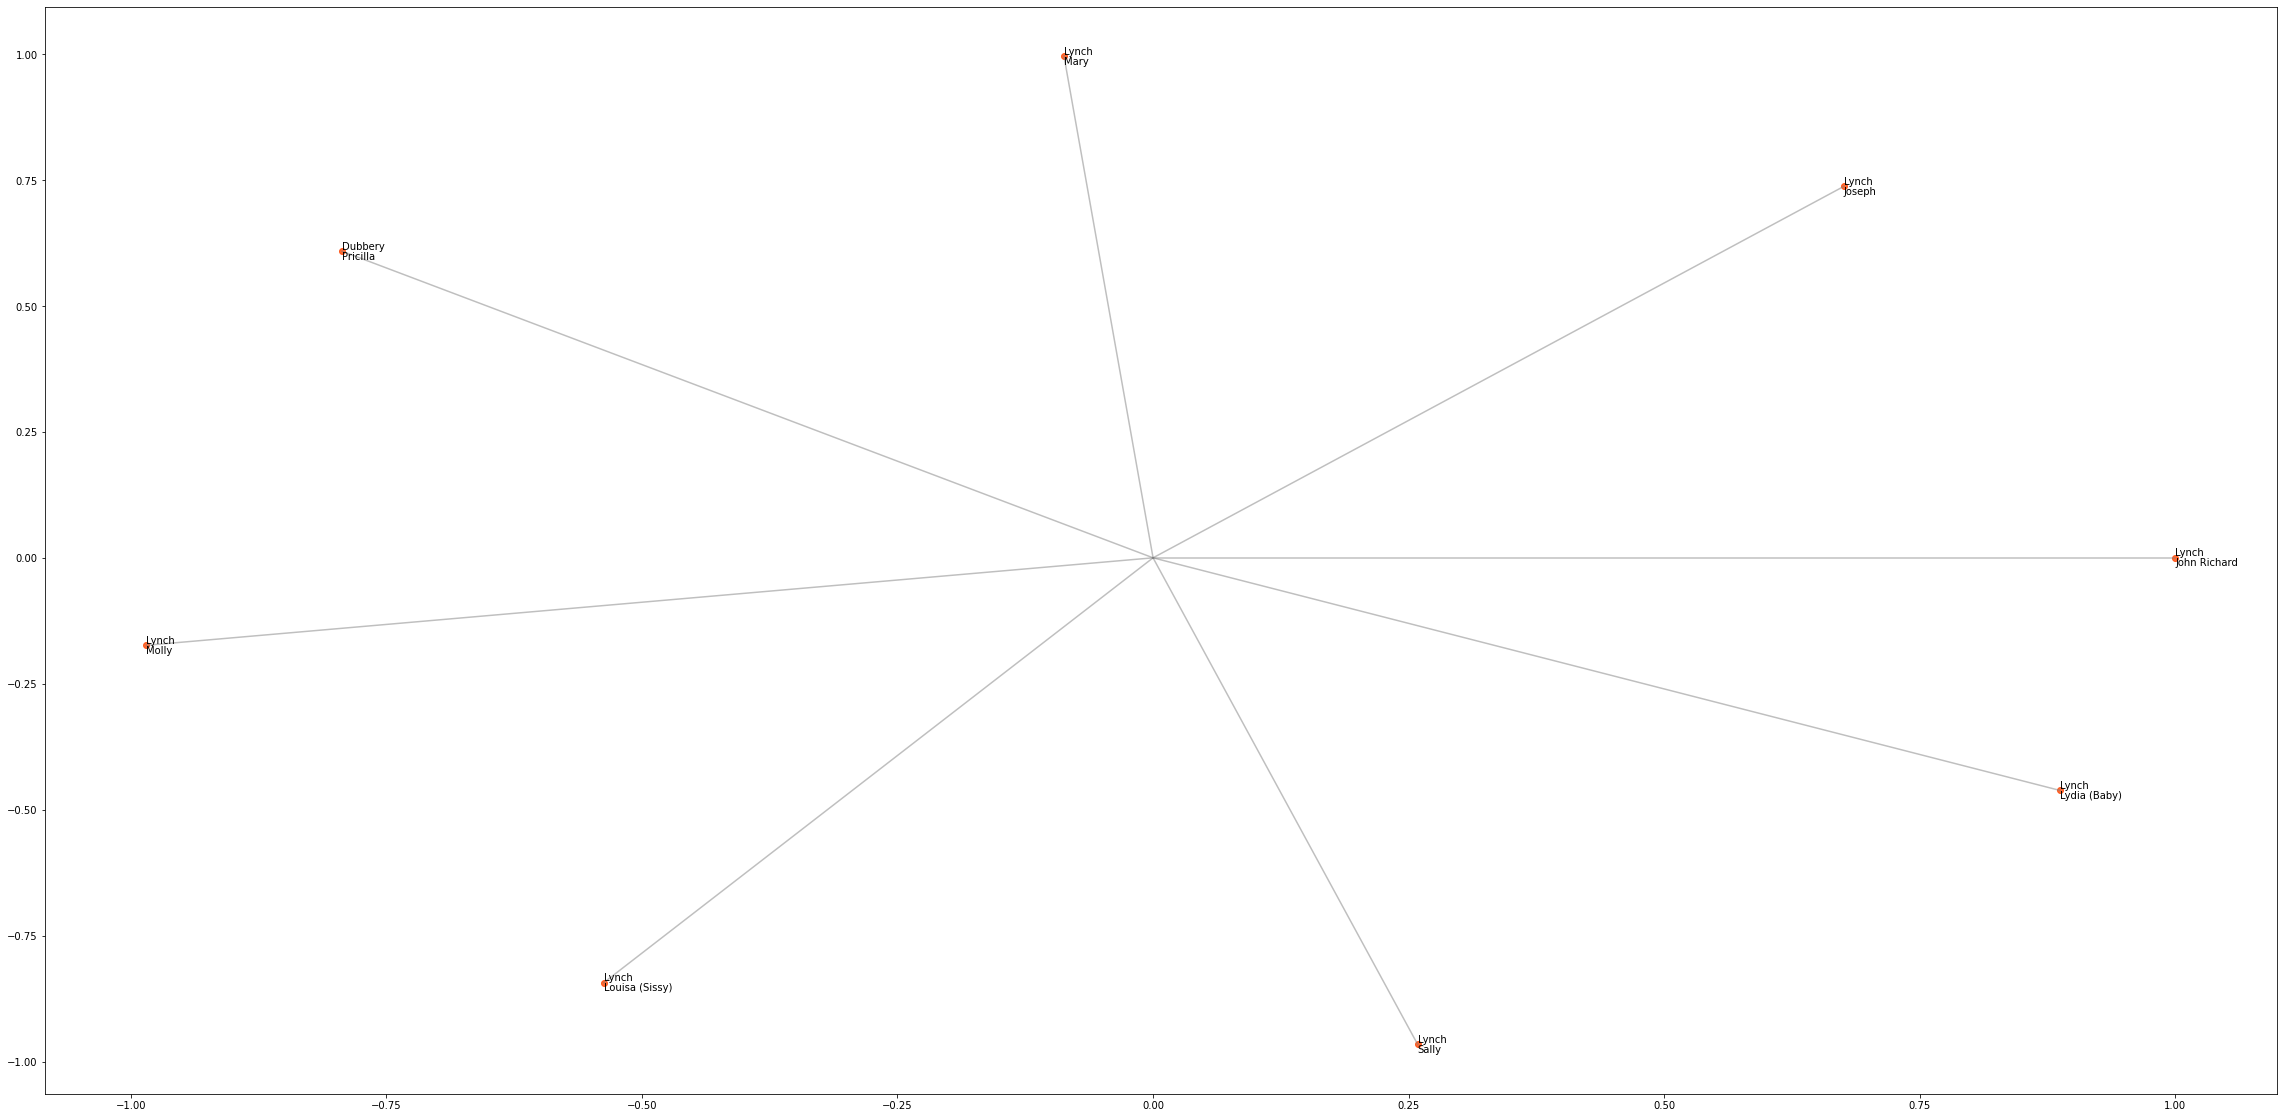

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(40,20))



# Loop thorugh each flight entry
for x,x2,y,y2,First,Last in zip(Gen1['xo'],Gen1['x'],Gen1['yo'],Gen1['y'],Gen1['First Name'],Gen1['Last Name']):
    plt.plot([x,x2],[y,y2], color="grey", alpha=0.5)
    plt.scatter(x2,y2,color="orangered", alpha=0.8,)
    plt.text(x2,y2,First,verticalalignment='top')                    
    plt.text(x2,y2,Last,verticalalignment='bottom') 

Coding for Generation 2

In [ ]:
#get a list of all the kids of Generation 1

Gen2a=pd.merge(Gen1,stats_df,left_on='PersonID',right_on='FatherID')
Gen2b=pd.merge(Gen1,stats_df,left_on='PersonID',right_on='MotherID')
Gen2=pd.concat([Gen2a,Gen2b])
Gen2=Gen2.sort_values(['PersonID_x','PersonID_y'])
Gen2=Gen2.reset_index()
display(Gen2)

,index,PersonID_x,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,PersonID_y,First Name_y,Last Name_y,MotherID_y,FatherID_y
0,0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0
1,1,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,20,Winston,Lynch,13.0,12.0
2,2,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,21,Gwendolyn,Spencer,13.0,12.0
3,3,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,85,Rueben,Lynch,13.0,12.0
4,4,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,86,Leroy (Mackie),Lynch,13.0,12.0
5,5,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,87,Lucia,Lynch,0.0,12.0
6,6,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0,17,Thomas,Lynch,0.0,16.0
7,7,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0,18,James,Lynch,0.0,16.0
8,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0
9,1,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,41,Charolette,Lynch,24.0,39.0


In [ ]:

#theta =2*math.pi*abs(r)/len(points)
x_i=[]
y_i=[]
coord_x = []
coord_y=[]
theta_i=[]
index=0


for i in range(0,len(Gen2)):
 
  if Gen2.x[i] >=0:
    r=Gen2.x[i]+1
  else:
    r=Gen2.x[i]-1 
  x_i.append(r)

  if Gen2.y[i] >=0:
    r=Gen2.y[i]+1
  else:
    r=Gen2.y[i]-1  
  y_i.append(r)
  
  theta=math.radians(320/len(Gen2)*index)
  theta_i.append(theta)
  index +=1

for i in range(0, len(Gen2)):
    if x_i[i]>0:
      x2=x_i[i]+(x_i[i])*math.cos(theta_i[i])
    else:
      x2=(x_i[i]-((x_i[i])*math.cos(-theta_i[i])))
    coord_x.append(x2)
    
    if y_i[i]>0:
      y2=y_i[i]+(y_i[i])*math.sin(theta_i[i])
    else:
      y2=(y_i[i]-((y_i[i])*math.sin(theta_i[i])))
      
    coord_y.append(y2)


In [ ]:
display(coord_y)


[1.0,
 1.2131615586794162,
 1.4165249182320399,
 1.600742264237979,
 1.7573458492761798,
 1.8791372219950948,
 3.405963683742964,
 3.47064190553242,
 3.200011268003592,
 3.1129794957376737,
 2.9568047305266942,
 2.7386657125600076,
 2.4685894352064084,
 2.1589902435350914,
 1.8240991956612367,
 1.4793099169325725,
 1.1404710154691355,
 -1.7467738782932072,
 -1.9519208770808907,
 -3.553284727911314,
 -3.764029019319197,
 -2.893956240118468,
 -2.923365490552108,
 -2.885589957295121,
 -2.782366033153348,
 -2.61843851624919]

In [ ]:
Gen2['x2']=coord_x
Gen2['y2']=coord_y
Gen2.rename({'PersonID_x':'Gen1ID','PersonID_y':'PersonID','MotherID_y':'MotherID',
       'FatherID_y':"FatherID"},axis='columns', inplace=True)

Gen2.reset_index()

display(Gen2)

,index,Gen1ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,PersonID,First Name_y,Last Name_y,MotherID,FatherID,x2,y2
0,0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000
1,1,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,20,Winston,Lynch,13.0,12.0,3.954034,1.213162
2,2,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,21,Gwendolyn,Spencer,13.0,12.0,3.818249,1.416525
3,3,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,85,Rueben,Lynch,13.0,12.0,3.598886,1.600742
4,4,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,86,Leroy (Mackie),Lynch,13.0,12.0,3.306028,1.757346
5,5,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,87,Lucia,Lynch,0.0,12.0,2.953137,1.879137
6,6,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0,17,Thomas,Lynch,0.0,16.0,2.141769,3.405964
7,7,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0,18,James,Lynch,0.0,16.0,1.787985,3.470642
8,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0,-2.057237,3.200011
9,1,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,41,Charolette,Lynch,24.0,39.0,-2.429285,3.112979


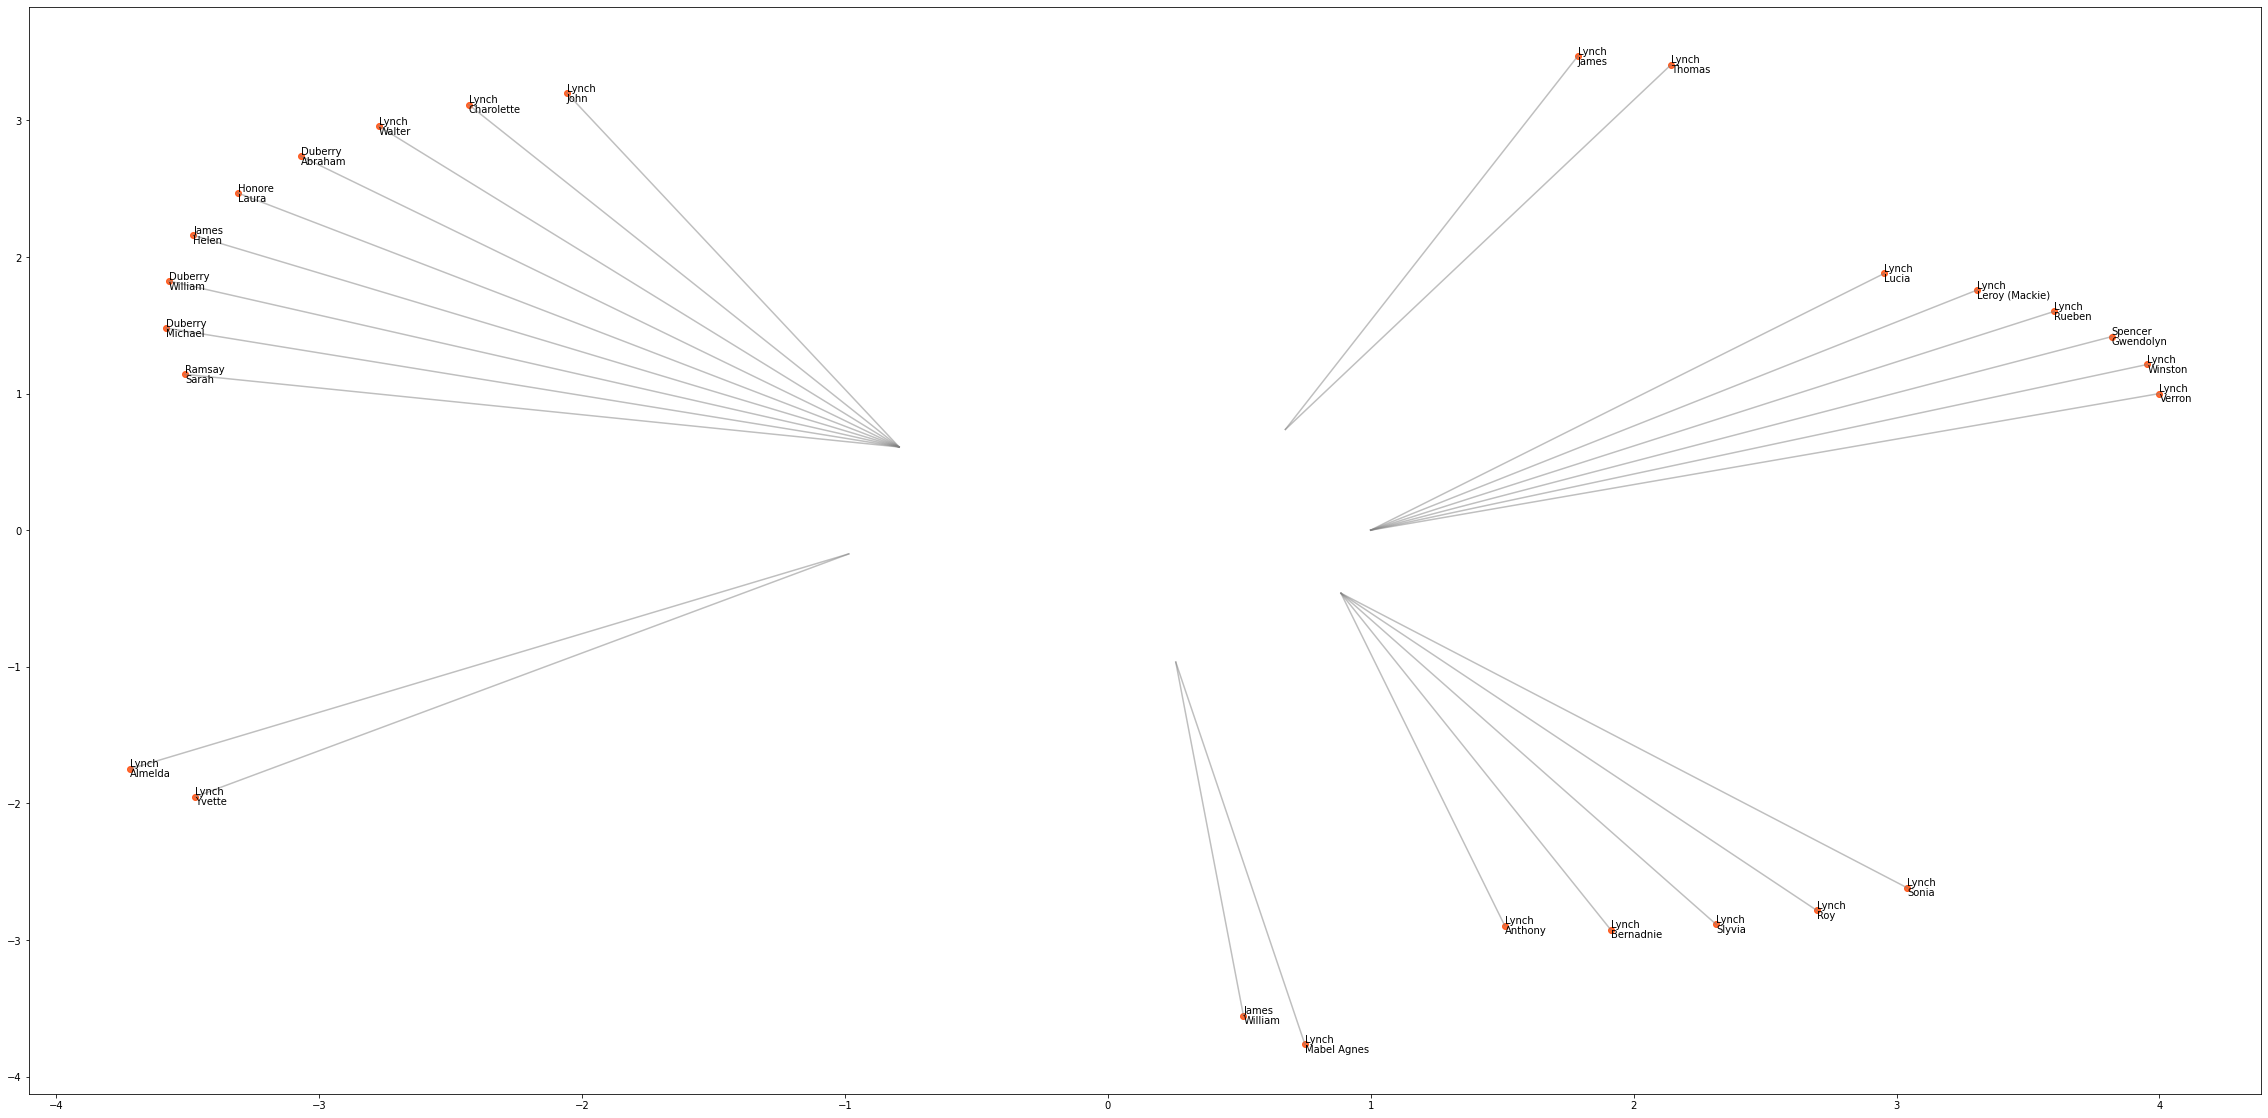

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(40,20))



# Loop thorugh each flight entry
for x,x2,y,y2,First,Last in zip(Gen2['x'],Gen2['x2'],Gen2['y'],Gen2['y2'],Gen2['First Name_y'],Gen2['Last Name_y']):
    plt.plot([x,x2],[y,y2], color="grey", alpha=0.5)
    plt.scatter(x2,y2,color="orangered", alpha=0.8,)
    plt.text(x2,y2,First,verticalalignment='top')                    
    plt.text(x2,y2,Last,verticalalignment='bottom')     

Generation 3

In [ ]:
#get a list of all the kids of Generation 3

Gen3a=pd.merge(Gen2,stats_df,left_on='PersonID',right_on='FatherID')
Gen3b=pd.merge(Gen2,stats_df,left_on='PersonID',right_on='MotherID')
Gen3=pd.concat([Gen3a,Gen3b])
Gen3=Gen3.sort_values(['Gen1ID','PersonID_x','PersonID_y'])

Gen3=Gen3.reset_index()
Gen3.info()

display(Gen3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       29 non-null     int64  
 1   index         29 non-null     int64  
 2   Gen1ID        29 non-null     int64  
 3   First Name_x  29 non-null     object 
 4   Last Name_x   29 non-null     object 
 5   MotherID_x    29 non-null     float64
 6   FatherID_x    29 non-null     float64
 7   x             29 non-null     float64
 8   y             29 non-null     float64
 9   xo            29 non-null     int64  
 10  yo            29 non-null     int64  
 11  PersonID_x    29 non-null     int64  
 12  First Name_y  29 non-null     object 
 13  Last Name_y   29 non-null     object 
 14  MotherID_x    29 non-null     float64
 15  FatherID_x    29 non-null     float64
 16  x2            29 non-null     float64
 17  y2            29 non-null     float64
 18  PersonID_y    29 non-null     in

,level_0,index,Gen1ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,PersonID_x,First Name_y,Last Name_y,MotherID_x,FatherID_x,x2,y2,PersonID_y,First Name,Last Name,MotherID_y,FatherID_y
0,0,0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,3,Dale,Lynch,2.0,1.0
1,1,0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,4,Lisa,Lynch,2.0,1.0
2,2,0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,5,Gail,Lynch-Joseph,0.0,1.0
3,3,1,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,20,Winston,Lynch,13.0,12.0,3.954034,1.213162,95,Joshua,Lynch,NaN,20.0
4,4,1,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,20,Winston,Lynch,13.0,12.0,3.954034,1.213162,96,Marisa,Lynch,NaN,20.0
5,0,2,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,21,Gwendolyn,Spencer,13.0,12.0,3.818249,1.416525,22,Dawn,Spencer,21.0,NaN
6,5,4,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,86,Leroy (Mackie),Lynch,13.0,12.0,3.306028,1.757346,88,Leslie,Lynch,0.0,86.0
7,6,4,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,86,Leroy (Mackie),Lynch,13.0,12.0,3.306028,1.757346,89,Linda,Lynch,0.0,86.0
8,7,4,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,86,Leroy (Mackie),Lynch,13.0,12.0,3.306028,1.757346,90,Lisa,Lynch,0.0,86.0
9,8,6,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0,17,Thomas,Lynch,0.0,16.0,2.141769,3.405964,98,Sonia,Lynch,NaN,17.0


In [ ]:
Gen3.iloc[12:27]

,level_0,index,Gen1ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,PersonID_x,First Name_y,Last Name_y,MotherID_x,FatherID_x,x2,y2,PersonID_y,First Name,Last Name,MotherID_y,FatherID_y
12,11,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0,-2.057237,3.200011,68,Kathleen,Lynch,NaN,40.0
13,12,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0,-2.057237,3.200011,69,Tony,Lynch,0.0,40.0
14,13,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0,-2.057237,3.200011,70,Kim,Lynch,0.0,40.0
15,1,1,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,41,Charolette,Lynch,24.0,39.0,-2.429285,3.112979,49,Janice,Daley,41.0,0.0
16,2,1,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,41,Charolette,Lynch,24.0,39.0,-2.429285,3.112979,50,Frankie,Williams,41.0,0.0
17,14,2,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,42,Walter,Lynch,24.0,39.0,-2.772102,2.956805,51,Ian,Lynch,0.0,42.0
18,15,2,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,42,Walter,Lynch,24.0,39.0,-2.772102,2.956805,52,Sharon,Lynch,0.0,42.0
19,16,2,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,42,Walter,Lynch,24.0,39.0,-2.772102,2.956805,53,Lynn,Ryan,0.0,42.0
20,3,4,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,44,Laura,Honore,24.0,39.0,-3.309078,2.468589,54,Jimmy,Honore,44.0,0.0
21,4,5,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,55,Patricia,James,45.0,0.0


In [ ]:
Gen3.columns

Index(['level_0', 'index', 'Gen1ID', 'First Name_x', 'Last Name_x',
       'MotherID_x', 'FatherID_x', 'x', 'y', 'xo', 'yo', 'PersonID_x',
       'First Name_y', 'Last Name_y', 'MotherID_x', 'FatherID_x', 'x2', 'y2',
       'PersonID_y', 'First Name', 'Last Name', 'MotherID_y', 'FatherID_y'],
      dtype='object')

In [ ]:



#calculate angle 360/points

#theta =2*math.pi*abs(r)/len(points)
x_i=[]
y_i=[]
coord_x = []
coord_y=[]
theta_i=[]
index=0

#keeps the coordinates in the right quadrant and steps out the radius
for i in range(0,len(Gen3)):
 
  if Gen3.x2[i] >=0:
    r=Gen3.x2[i]+1
  else:
    r=Gen3.x2[i]-1
  x_i.append(r)

  if Gen3.y2[i] >=0:
    r=Gen3.y2[i]+1
  else:
    r=Gen3.y2[i]-1 
  y_i.append(r)
  
  #Calculate the radian length for each coordinate
  theta=math.radians(250/len(Gen3)*index)
  theta_i.append(theta)
  index +=1

#Calculate the x2,y2 position for each coordinate

for i in range(0, len(Gen3)):
    if x_i[i]>=0:
      x2=x_i[i]+(x_i[i]*math.cos(theta_i[i]))
    else:
      x2=x_i[i]-(x_i[i]*math.cos(-theta_i[i]))
    coord_x.append(x2)
    
    if y_i[i]>=0:
      y2=y_i[i]+(y_i[i]*math.sin(theta_i[i]))
    else:
      y2=(y_i[i]-((y_i[i])*math.sin(theta_i[i])))
      
    coord_y.append(y2)


In [ ]:
y_i[24]
theta_i[24]

3.611026038608958

In [ ]:
Gen3['x3']=coord_x
Gen3['y3']=coord_y
Gen3.rename({'PersonID_x':'Gen2ID','PersonID_y':'PersonID','MotherID_y':'MotherID',
       'FatherID_y':"FatherID",'First Name_y':'First Name3','Last Name_y':'Last Name3'},axis='columns', inplace=True)
display(Gen3.iloc[10:35])

,level_0,index,Gen1ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,Gen2ID,First Name3,Last Name3,MotherID_x,FatherID_x,x2,y2,PersonID,First Name,Last Name,MotherID,FatherID,x3,y3
10,9,7,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0,18,James,Lynch,0.0,16.0,1.787985,3.470642,19,Colin,Lynch,94.0,18.0,2.972421,8.931491
11,10,7,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0,18,James,Lynch,0.0,16.0,1.787985,3.470642,93,Brian,Lynch,94.0,18.0,2.553355,8.925424
12,11,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0,-2.057237,3.200011,68,Kathleen,Lynch,NaN,40.0,-3.768251,8.284859
13,12,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0,-2.057237,3.200011,69,Tony,Lynch,0.0,40.0,-4.205909,8.092297
14,13,0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,40,John,Lynch,24.0,39.0,-2.057237,3.200011,70,Kim,Lynch,0.0,40.0,-4.617613,7.811788
15,1,1,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,41,Charolette,Lynch,24.0,39.0,-2.429285,3.112979,49,Janice,Daley,41.0,0.0,-5.601808,7.295298
16,2,1,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,41,Charolette,Lynch,24.0,39.0,-2.429285,3.112979,50,Frankie,Williams,41.0,0.0,-5.974977,6.868777
17,14,2,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,42,Walter,Lynch,24.0,39.0,-2.772102,2.956805,51,Ian,Lynch,0.0,42.0,-6.919483,6.137732
18,15,2,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,42,Walter,Lynch,24.0,39.0,-2.772102,2.956805,52,Sharon,Lynch,0.0,42.0,-7.195569,5.618224
19,16,2,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,42,Walter,Lynch,24.0,39.0,-2.772102,2.956805,53,Lynn,Ryan,0.0,42.0,-7.394301,5.061175


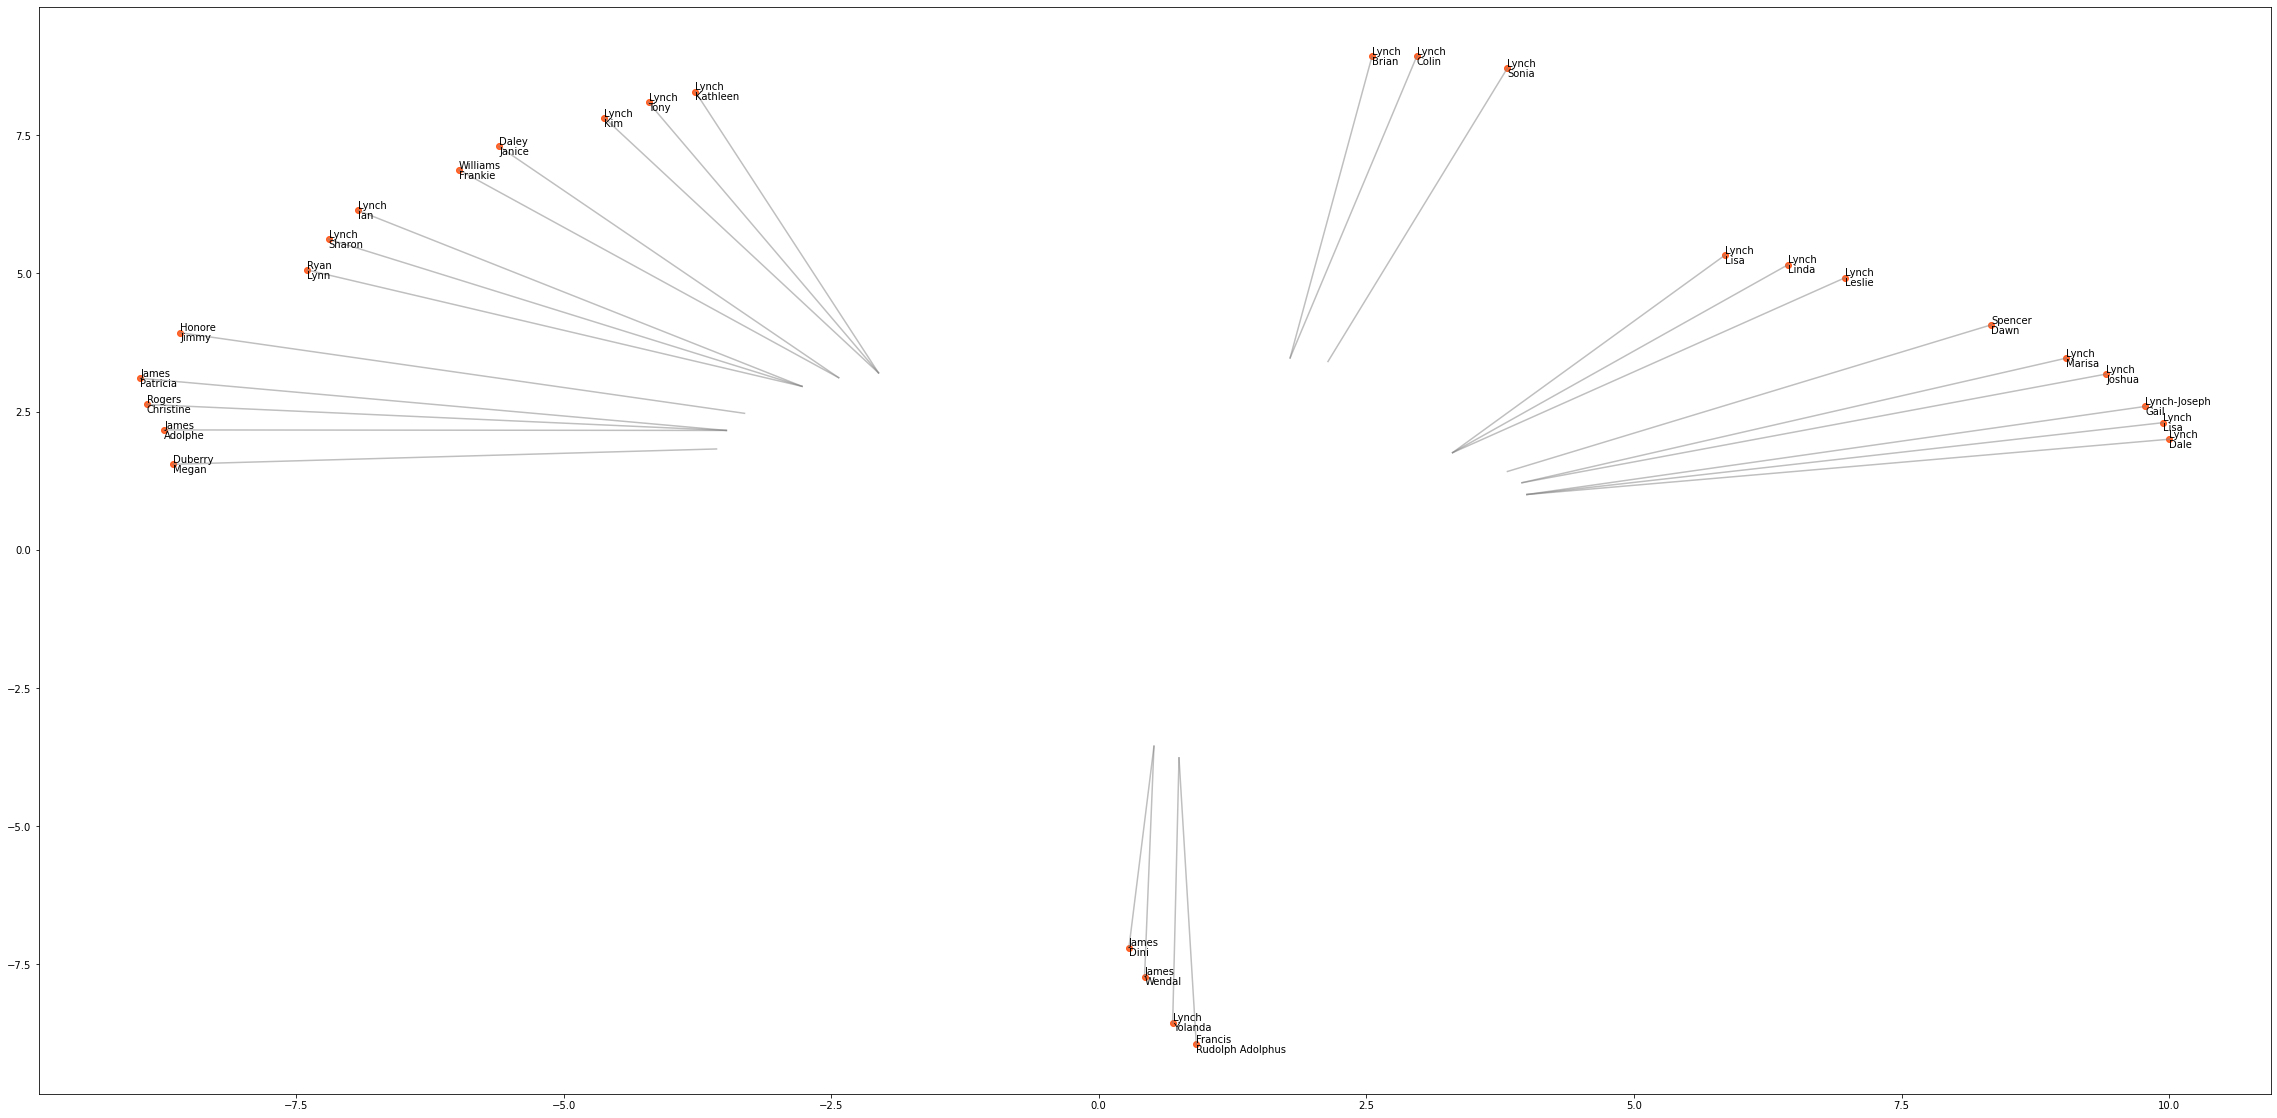

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(40,20))



# Loop thorugh each flight entry
for x,x2,y,y2,First,Last in zip(Gen3['x2'],Gen3['x3'],Gen3['y2'],Gen3['y3'],Gen3['First Name'],Gen3['Last Name']):
    plt.plot([x,x2],[y,y2], color="grey", alpha=0.5)
    plt.scatter(x2,y2,color="orangered", alpha=0.8,)
    plt.text(x2,y2,First,verticalalignment='top')                    
    plt.text(x2,y2,Last,verticalalignment='bottom')

Generation 4 code

In [ ]:
#get a list of all the kids of Generation 4

Gen4a=pd.merge(Gen3,stats_df,left_on='PersonID',right_on='FatherID')
Gen4b=pd.merge(Gen3,stats_df,left_on='PersonID',right_on='MotherID')
Gen4=pd.concat([Gen4a,Gen4b])
Gen4=Gen4.sort_values(['Gen1ID','Gen2ID','PersonID_x','PersonID_y'])
Gen4=Gen4.astype({'level_0':'float','index':'float'})
Gen4=Gen4.drop(['level_0'],axis=1)
Gen4=Gen4.reset_index()
Gen4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       15 non-null     int64  
 1   index         15 non-null     float64
 2   Gen1ID        15 non-null     int64  
 3   First Name_x  15 non-null     object 
 4   Last Name_x   15 non-null     object 
 5   MotherID_x    15 non-null     float64
 6   FatherID_x    15 non-null     float64
 7   x             15 non-null     float64
 8   y             15 non-null     float64
 9   xo            15 non-null     int64  
 10  yo            15 non-null     int64  
 11  Gen2ID        15 non-null     int64  
 12  First Name3   15 non-null     object 
 13  Last Name3    15 non-null     object 
 14  MotherID_x    15 non-null     float64
 15  FatherID_x    15 non-null     float64
 16  x2            15 non-null     float64
 17  y2            15 non-null     float64
 18  PersonID_x    15 non-null     in

In [ ]:
Gen4

,level_0,index,Gen1ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,Gen2ID,First Name3,Last Name3,MotherID_x,FatherID_x,x2,y2,PersonID_x,First Name_x,Last Name_x,MotherID_x,FatherID_x,x3,y3,PersonID_y,First Name_y,Last Name_y,MotherID_y,FatherID_y
0,0,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,7,Joshua,Lynch,10.0,3.0
1,1,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,8,Josiah,Lynch,10.0,3.0
2,2,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,9,Lyndon-Jude,Lynch,10.0,3.0
3,0,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,4,Lisa,Lynch,2.0,1.0,9.943512,2.299785,11,Zoe,Lyon,4.0,0.0
4,1,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,5,Gail,Lynch-Joseph,0.0,1.0,9.775323,2.592796,6,Reese,Lynch-Joseph,5.0,0.0
5,2,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,55,Patricia,James,45.0,0.0,-8.956379,3.101957,65,Stephen,James,55.0,0.0
6,3,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,55,Patricia,James,45.0,0.0,-8.956379,3.101957,66,Daniel,James,55.0,0.0
7,4,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,56,Christine,Rogers,45.0,0.0,-8.893670,2.629170,61,Emmanual,Rogers,56.0,0.0
8,5,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,56,Christine,Rogers,45.0,0.0,-8.893670,2.629170,62,Alexander,Rogers,56.0,0.0
9,6,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,56,Christine,Rogers,45.0,0.0,-8.893670,2.629170,63,Chantyl,Rogers,56.0,0.0


In [ ]:


x_i=[]
y_i=[]
coord_x = []
coord_y=[]
theta_i=[]
index=0

#keeps the coordinates in the right quadrant and steps out the radius
for i in range(0,len(Gen4)):
 
  if Gen4.x3[i] >=0:
    r=Gen4.x3[i]+1
  else:
    r=Gen4.x3[i]-1
  x_i.append(r)

  if Gen4.y3[i] >=0:
    r=Gen4.y3[i]+1
  else:
    r=Gen4.y3[i]-1
  y_i.append(r)
  
  #Calculate the radian length for each coordinate. Adjust 360 value to limit the spread of points around a circle
  theta=math.radians(275/len(Gen4)*index)
  theta_i.append(theta)
  index +=1

#Calculate the x2,y2 position for each coordinate

for i in range(0, len(Gen4)):
    if x_i[i]>=0:
      x2=x_i[i]+(x_i[i]*math.cos(theta_i[i]))
    else:
      x2=x_i[i]-(x_i[i]*math.cos(-theta_i[i]))
    coord_x.append(x2)
    
    if y_i[i]>=0:
      y2=y_i[i]+(math.sin(theta_i[i]))
    else:
      y2=(y_i[i]-((y_i[i])*math.sin(theta_i[i])))
      
    coord_y.append(y2)

In [ ]:
y_i

[3.0,
 3.0,
 3.0,
 3.299784752380786,
 3.5927957597485385,
 4.101957362197243,
 4.101957362197243,
 3.629170324424253,
 3.629170324424253,
 3.629170324424253,
 3.629170324424253,
 3.168354759537663,
 3.168354759537663,
 3.168354759537663,
 -9.94594162486495]

In [ ]:
theta_i

[0.0,
 0.31997702953229373,
 0.6399540590645875,
 0.9599310885968813,
 1.279908118129175,
 1.5998851476614686,
 1.9198621771937625,
 2.2398392067260557,
 2.55981623625835,
 2.8797932657906435,
 3.199770295322937,
 3.519747324855231,
 3.839724354387525,
 4.159701383919819,
 4.4796784134521115]

In [ ]:
Gen4['x4']=coord_x
Gen4['y4']=coord_y
Gen4.rename({'PersonID_x':'Gen3ID','PersonID_y':'PersonID','MotherID_y':'MotherID',
       'FatherID_y':"FatherID"},axis='columns', inplace=True)
display(Gen4)

,level_0,index,Gen1ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,Gen2ID,First Name3,Last Name3,MotherID_x,FatherID_x,x2,y2,Gen3ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x3,y3,PersonID,First Name_y,Last Name_y,MotherID,FatherID,x4,y4
0,0,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,7,Joshua,Lynch,10.0,3.0,22.000000,3.000000
1,1,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,8,Josiah,Lynch,10.0,3.0,21.441669,3.314545
2,2,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,9,Lyndon-Jude,Lynch,10.0,3.0,19.823355,3.597159
3,0,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,4,Lisa,Lynch,2.0,1.0,9.943512,2.299785,11,Zoe,Lyon,4.0,0.0,17.220452,4.118937
4,1,0.0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,5,Gail,Lynch-Joseph,0.0,1.0,9.775323,2.592796,6,Reese,Lynch-Joseph,5.0,0.0,13.865720,4.550785
5,2,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,55,Patricia,James,45.0,0.0,-8.956379,3.101957,65,Stephen,James,55.0,0.0,-10.245957,5.101534
6,3,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,55,Patricia,James,45.0,0.0,-8.956379,3.101957,66,Daniel,James,55.0,0.0,-13.361661,5.041650
7,4,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,56,Christine,Rogers,45.0,0.0,-8.893670,2.629170,61,Emmanual,Rogers,56.0,0.0,-16.030075,4.413586
8,5,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,56,Christine,Rogers,45.0,0.0,-8.893670,2.629170,62,Alexander,Rogers,56.0,0.0,-18.159710,4.178679
9,6,5.0,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0,45,Helen,James,24.0,39.0,-3.478554,2.158990,56,Christine,Rogers,45.0,0.0,-8.893670,2.629170,63,Chantyl,Rogers,56.0,0.0,-19.450221,3.887989


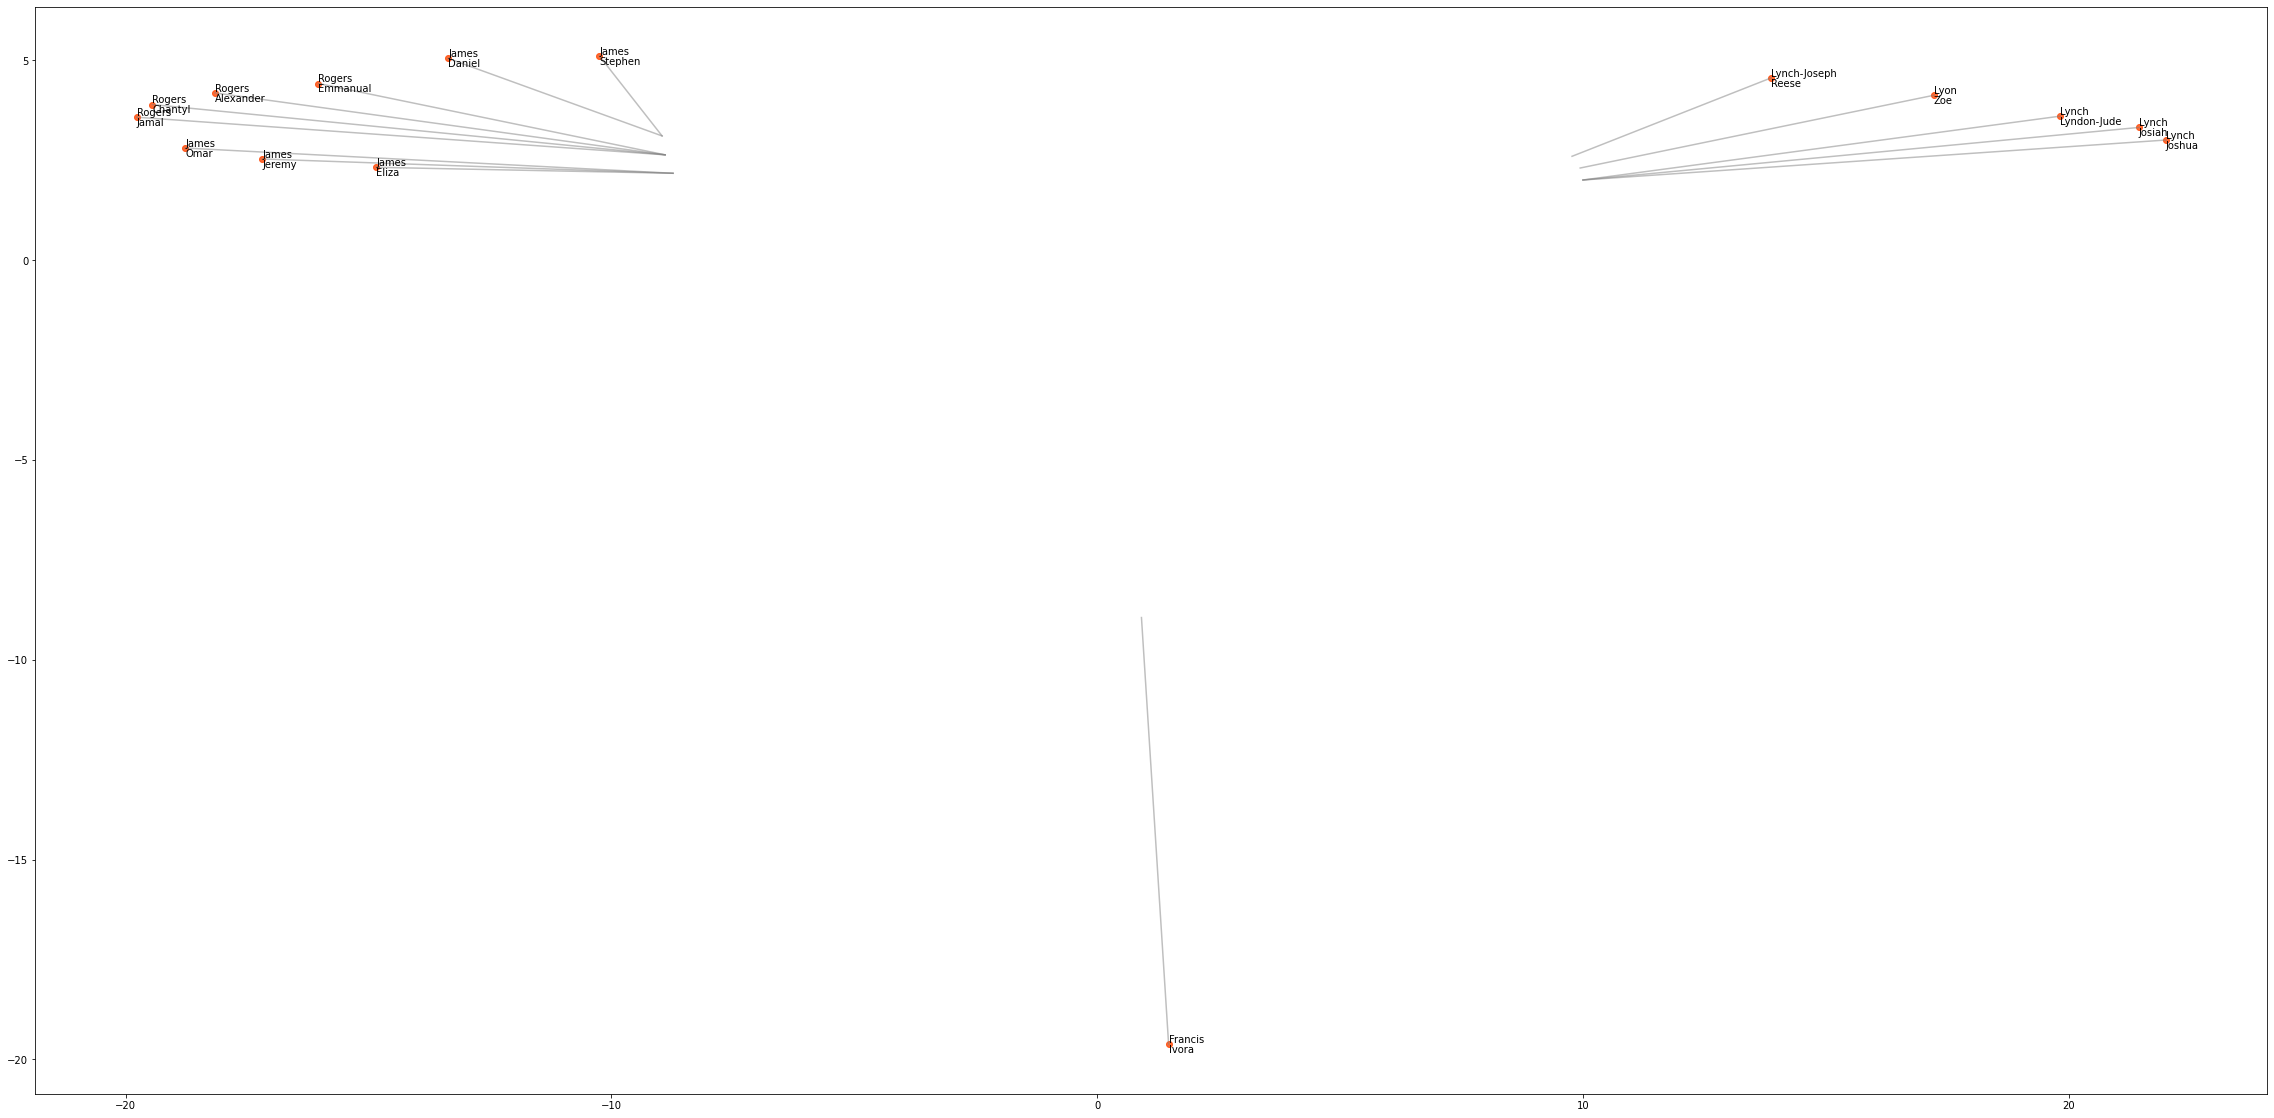

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(40,20))



# Loop thorugh each flight entry
for x,x2,y,y2,First,Last in zip(Gen4['x3'],Gen4['x4'],Gen4['y3'],Gen4['y4'],Gen4['First Name_y'],Gen4['Last Name_y']):
    plt.plot([x,x2],[y,y2], color="grey", alpha=0.5)
    plt.scatter(x2,y2,color="orangered", alpha=0.8,)
    plt.text(x2,y2,First,verticalalignment='top')                    
    plt.text(x2,y2,Last,verticalalignment='bottom')

Generation 5 code

In [ ]:
#get a list of all the kids of Generation 4

Gen5a=pd.merge(Gen4,stats_df,left_on='PersonID',right_on='FatherID')
Gen5b=pd.merge(Gen4,stats_df,left_on='PersonID',right_on='MotherID')
Gen5=pd.concat([Gen5a,Gen5b])
Gen5=Gen5.sort_values(['Gen1ID','PersonID_x'])

Gen5

,level_0,index,Gen1ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x,y,xo,yo,Gen2ID,First Name3,Last Name3,MotherID_x,FatherID_x,x2,y2,Gen3ID,First Name_x,Last Name_x,MotherID_x,FatherID_x,x3,y3,PersonID_x,First Name_y,Last Name_y,MotherID_x,FatherID_x,x4,y4,PersonID_y,First Name,Last Name,MotherID_y,FatherID_y


EMPTY

Concat DF, reshape and plot Scatter graph

In [ ]:
Gen1.columns

Index(['PersonID', 'First Name', 'Last Name', 'MotherID', 'FatherID', 'x', 'y',
       'xo', 'yo'],
      dtype='object')

In [ ]:
#Gen1

Gen1.rename({'x':'x2','y':'y2','xo':'x','yo':'y'},axis='columns', inplace=True)
Gen1

,PersonID,First Name,Last Name,MotherID,FatherID,x2,y2,x,y
0,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0,0
1,16,Joseph,Lynch,15.0,14.0,0.675590,0.737277,0,0
2,23,Mary,Lynch,15.0,14.0,-0.087156,0.996195,0,0
3,24,Pricilla,Dubbery,15.0,14.0,-0.793353,0.608761,0,0
4,25,Molly,Lynch,15.0,14.0,-0.984808,-0.173648,0,0
5,26,Louisa (Sissy),Lynch,15.0,14.0,-0.537300,-0.843391,0,0
6,27,Sally,Lynch,15.0,14.0,0.258819,-0.965926,0,0
7,28,Lydia (Baby),Lynch,15.0,14.0,0.887011,-0.461749,0,0


In [ ]:
Gen2.columns

Index(['index', 'Gen1ID', 'First Name_x', 'Last Name_x', 'MotherID_x',
       'FatherID_x', 'x', 'y', 'xo', 'yo', 'PersonID', 'First Name_y',
       'Last Name_y', 'MotherID', 'FatherID', 'x2', 'y2'],
      dtype='object')

In [ ]:
Gen2
Gen2.rename({'First Name_y':'First Name','Last Name_y':'Last Name'},axis='columns', inplace=True)
Gen2=Gen2[['PersonID','First Name','Last Name','MotherID','FatherID','x2','y2','x','y']]
display(Gen2)

,PersonID,First Name,Last Name,MotherID,FatherID,x2,y2,x,y
0,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,1.000000,0.000000
1,20,Winston,Lynch,13.0,12.0,3.954034,1.213162,1.000000,0.000000
2,21,Gwendolyn,Spencer,13.0,12.0,3.818249,1.416525,1.000000,0.000000
3,85,Rueben,Lynch,13.0,12.0,3.598886,1.600742,1.000000,0.000000
4,86,Leroy (Mackie),Lynch,13.0,12.0,3.306028,1.757346,1.000000,0.000000
5,87,Lucia,Lynch,0.0,12.0,2.953137,1.879137,1.000000,0.000000
6,17,Thomas,Lynch,0.0,16.0,2.141769,3.405964,0.675590,0.737277
7,18,James,Lynch,0.0,16.0,1.787985,3.470642,0.675590,0.737277
8,40,John,Lynch,24.0,39.0,-2.057237,3.200011,-0.793353,0.608761
9,41,Charolette,Lynch,24.0,39.0,-2.429285,3.112979,-0.793353,0.608761


In [ ]:
Gen3.columns

Index(['level_0', 'index', 'Gen1ID', 'First Name_x', 'Last Name_x',
       'MotherID_x', 'FatherID_x', 'x', 'y', 'xo', 'yo', 'Gen2ID',
       'First Name3', 'Last Name3', 'MotherID_x', 'FatherID_x', 'x2', 'y2',
       'PersonID', 'First Name', 'Last Name', 'MotherID', 'FatherID', 'x3',
       'y3'],
      dtype='object')

In [ ]:
Gen3
Gen3=Gen3[['PersonID','First Name','Last Name','MotherID','FatherID','x3','y3','x2','y2']].reset_index()
Gen3.rename({'x3':'x2','y3':'y2','x2':'x','y2':'y'},axis='columns', inplace=True)
display(Gen3)

,index,PersonID,First Name,Last Name,MotherID,FatherID,x2,y2,x,y
0,0,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,4.000000,1.000000
1,1,4,Lisa,Lynch,2.0,1.0,9.943512,2.299785,4.000000,1.000000
2,2,5,Gail,Lynch-Joseph,0.0,1.0,9.775323,2.592796,4.000000,1.000000
3,3,95,Joshua,Lynch,NaN,20.0,9.411905,3.178556,3.954034,1.213162
4,4,96,Marisa,Lynch,NaN,20.0,9.037627,3.466161,3.954034,1.213162
5,5,22,Dawn,Spencer,21.0,NaN,8.336154,4.067779,3.818249,1.416525
6,6,88,Leslie,Lynch,0.0,86.0,6.973390,4.921965,3.306028,1.757346
7,7,89,Linda,Lynch,0.0,86.0,6.436560,5.153531,3.306028,1.757346
8,8,90,Lisa,Lynch,0.0,86.0,5.851590,5.330955,3.306028,1.757346
9,9,98,Sonia,Lynch,NaN,17.0,3.817156,8.708918,2.141769,3.405964


In [ ]:
Gen3.head(5)

,index,PersonID,First Name,Last Name,MotherID,FatherID,x2,y2,x,y
0,0,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,4.000000,1.000000
1,1,4,Lisa,Lynch,2.0,1.0,9.943512,2.299785,4.000000,1.000000
2,2,5,Gail,Lynch-Joseph,0.0,1.0,9.775323,2.592796,4.000000,1.000000
3,3,95,Joshua,Lynch,NaN,20.0,9.411905,3.178556,3.954034,1.213162
4,4,96,Marisa,Lynch,NaN,20.0,9.037627,3.466161,3.954034,1.213162


In [ ]:
Gen4.columns

Index(['level_0', 'index', 'Gen1ID', 'First Name_x', 'Last Name_x',
       'MotherID_x', 'FatherID_x', 'x', 'y', 'xo', 'yo', 'Gen2ID',
       'First Name3', 'Last Name3', 'MotherID_x', 'FatherID_x', 'x2', 'y2',
       'Gen3ID', 'First Name_x', 'Last Name_x', 'MotherID_x', 'FatherID_x',
       'x3', 'y3', 'PersonID', 'First Name_y', 'Last Name_y', 'MotherID',
       'FatherID', 'x4', 'y4'],
      dtype='object')

In [ ]:

Gen4.rename({'First Name_y':'First Name','Last Name_y':'Last Name'},axis='columns', inplace=True)
Gen4=Gen4[['PersonID','First Name','Last Name','MotherID','FatherID','x4','y4','x3','y3']]
Gen4.rename({'x4':'x2','y4':'y2','x3':'x','y3':'y'},axis='columns', inplace=True)
display(Gen4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PersonID,First Name,Last Name,MotherID,FatherID,x2,y2,x,y
0,7,Joshua,Lynch,10.0,3.0,22.000000,3.000000,10.000000,2.000000
1,8,Josiah,Lynch,10.0,3.0,21.441669,3.314545,10.000000,2.000000
2,9,Lyndon-Jude,Lynch,10.0,3.0,19.823355,3.597159,10.000000,2.000000
3,11,Zoe,Lyon,4.0,0.0,17.220452,4.118937,9.943512,2.299785
4,6,Reese,Lynch-Joseph,5.0,0.0,13.865720,4.550785,9.775323,2.592796
5,65,Stephen,James,55.0,0.0,-10.245957,5.101534,-8.956379,3.101957
6,66,Daniel,James,55.0,0.0,-13.361661,5.041650,-8.956379,3.101957
7,61,Emmanual,Rogers,56.0,0.0,-16.030075,4.413586,-8.893670,2.629170
8,62,Alexander,Rogers,56.0,0.0,-18.159710,4.178679,-8.893670,2.629170
9,63,Chantyl,Rogers,56.0,0.0,-19.450221,3.887989,-8.893670,2.629170


In [ ]:
 DF=pd.concat([Gen0,Gen1, Gen2, Gen3, Gen4,], ignore_index=True).fillna(0)
DF=DF.sort_values('PersonID')
 DF.head(20)

,PersonID,First Name,Last Name,MotherID,FatherID,x2,y2,x,y,index
10,1,Verron,Lynch,13.0,12.0,4.000000,1.000000,1.000000,0.000000,0.0
36,3,Dale,Lynch,2.0,1.0,10.000000,2.000000,4.000000,1.000000,0.0
37,4,Lisa,Lynch,2.0,1.0,9.943512,2.299785,4.000000,1.000000,1.0
38,5,Gail,Lynch-Joseph,0.0,1.0,9.775323,2.592796,4.000000,1.000000,2.0
69,6,Reese,Lynch-Joseph,5.0,0.0,13.865720,4.550785,9.775323,2.592796,0.0
65,7,Joshua,Lynch,10.0,3.0,22.000000,3.000000,10.000000,2.000000,0.0
66,8,Josiah,Lynch,10.0,3.0,21.441669,3.314545,10.000000,2.000000,0.0
67,9,Lyndon-Jude,Lynch,10.0,3.0,19.823355,3.597159,10.000000,2.000000,0.0
68,11,Zoe,Lyon,4.0,0.0,17.220452,4.118937,9.943512,2.299785,0.0
2,12,John Richard,Lynch,15.0,14.0,1.000000,0.000000,0.000000,0.000000,0.0


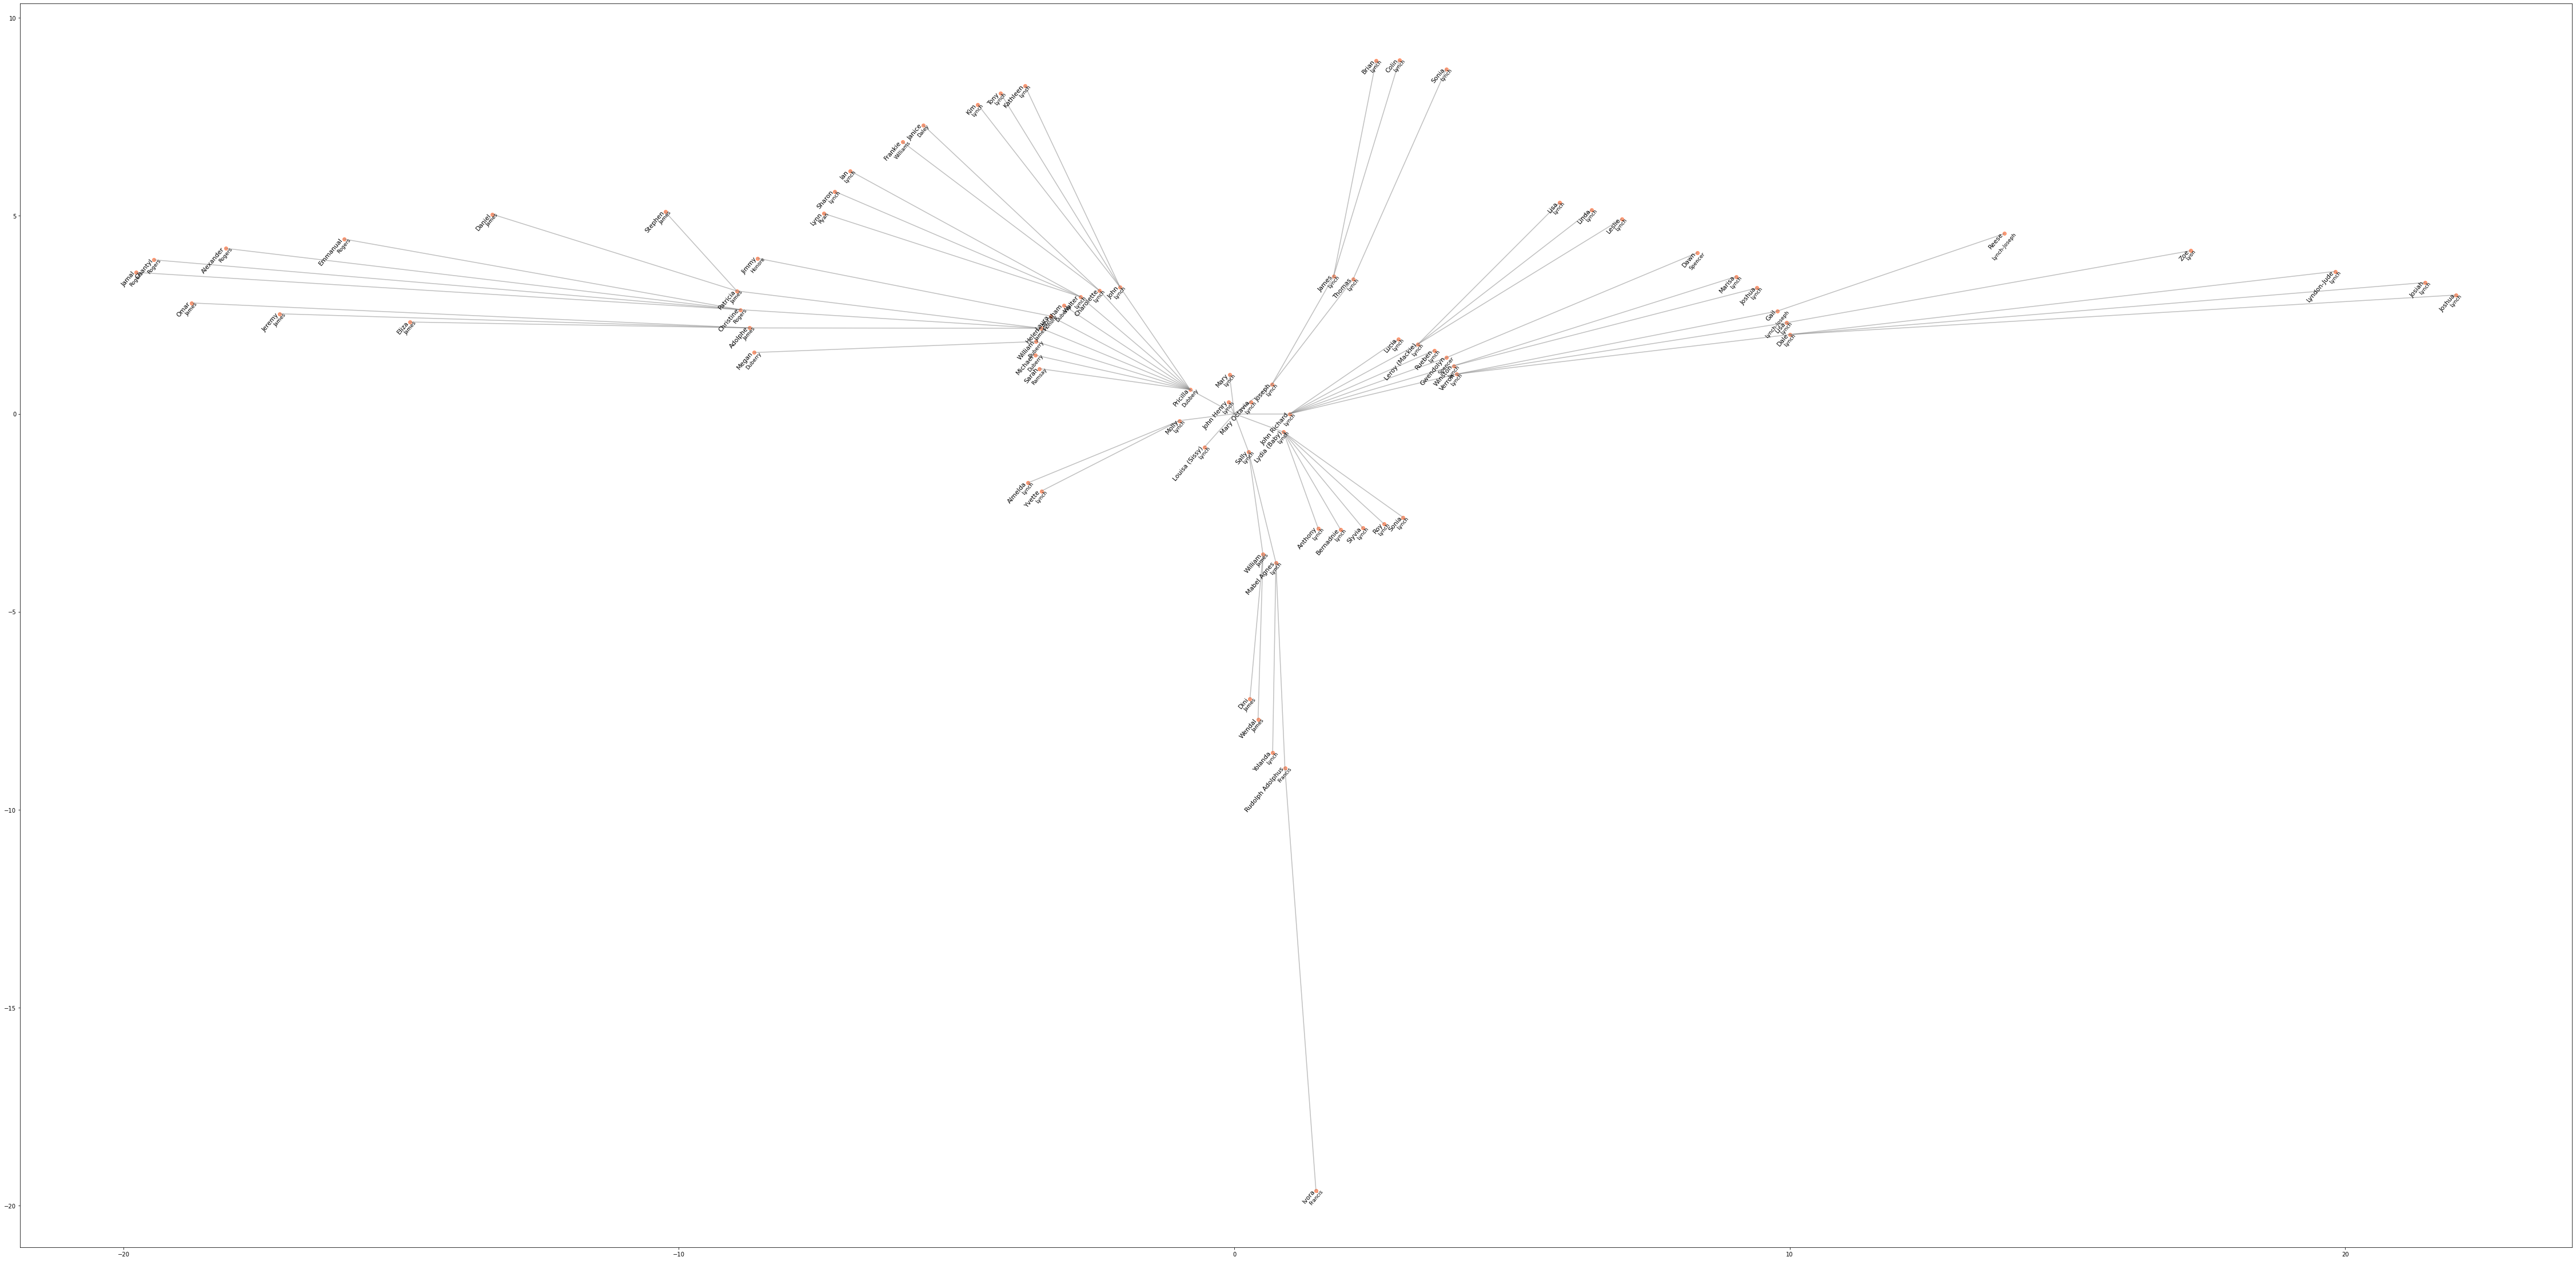

In [ ]:

import matplotlib.pyplot as plt



plt.figure(figsize=(80,40))



# Loop thorugh each entry
for x,x2,y,y2,First,Last in zip(DF['x'],DF['x2'],DF['y'],DF['y2'],DF['First Name'],DF['Last Name']):
    plt.plot([x,x2],[y,y2], color="grey", alpha=0.5)
    plt.scatter(x2,y2,color="orangered", alpha=0.5,)               
    plt.text(x2,y2,First,horizontalalignment='right',verticalalignment='center_baseline',fontsize='11',rotation=50)     
    plt.text(x2,y2,Last,horizontalalignment='center',verticalalignment='center_baseline',fontsize='9',rotation=50)    

plt.savefig("Lynch", dpi=100,bbox='tight')

plotly express

In [ ]:
# x and y given as DataFrame columns
import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure()

fig = px.scatter(DF, x="x2", y="y2",
                 text = DF['First Name'] + "<br> " + DF['Last Name'],
                 hover_data=['First Name','Last Name']
                 )
fig.update_traces(
        textfont=dict(
        family="sans serif",
        size=11,
        color="light blue"))

# Loop thorugh each entry
for x,x2,y,y2,First,Last in zip(DF['x'],DF['x2'],DF['y'],DF['y2'],DF['First Name'],DF['Last Name']):
    fig.add_traces(go.Scatter(
        x=[x,x2],
        y=[y,y2],
        mode='lines + markers',
        line=dict(color='grey'),
        marker=dict(color='orangered'),
        hovertemplate=[]
        ))
fig.update_traces( textposition='bottom right',)   
fig.update_layout(title_text = 'Lynch Family Tree',
                  height=700, width=900,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False)
fig.show()

In [ ]:
import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)

In [ ]:
fig.write_html("/content/drive/MyDrive/Python Project/Montserrat/lynchfamily.html")

In [ ]:
!pip install chart_studio
import chart_studio


In [ ]:
import chart_studio.tools as tls
tls.get_embed('https://dl640.github.io/HMLynch/index.html') #change to your url

PlotlyError: ignored

# New Section